В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдені параметри моделі є близькими до ваших найкращих припущень?

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1wC8zqIxGkna18Tq2HpEl7Zn9EpqSqEQP8M-cMiIm55w/gviz/tq?tqx=out:csv&sheet=Sheet1")
non_smoker_df = df[df.smoker == 'no']
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


Нашою цільовою змінною `y` буде `charges` а незалежною змінною `x` буде значення `age`

C:\Users\shyx8\AppData\Local\Temp\ipykernel_34960\264277972.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


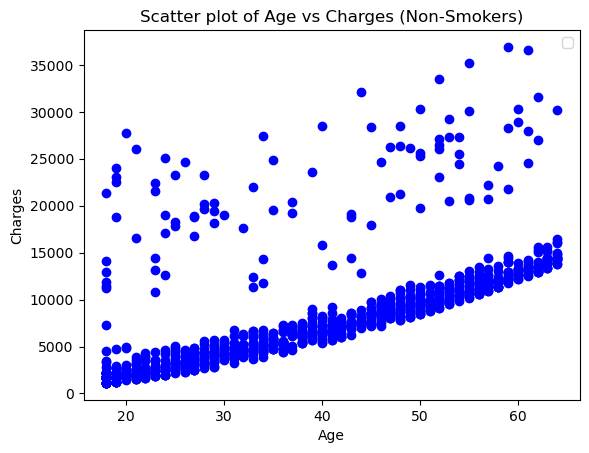

In [54]:
x1 = non_smoker_df['age']
y1 = non_smoker_df['charges']
plt.scatter(x1, y1, color='blue')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter plot of Age vs Charges (Non-Smokers)')
plt.legend()
plt.show()

Відповідь до завдання 1.1

Описуємо функцію для розв"язання рівняння методу найменших квадратів (MNK) і повертаємо результатом коефіцієнти (w, b):

In [56]:
def normal_equation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

Додаємо стовпець одиниць для `х` для можливості врахувати зміщення `b`

In [57]:
X_with_intercept1 = np.c_[np.ones(x1.shape[0]), x1]
print("X with intercept:\n", X_with_intercept1[:5])

X with intercept:
 [[ 1. 18.]
 [ 1. 28.]
 [ 1. 33.]
 [ 1. 32.]
 [ 1. 31.]]


In [58]:
MNK_koeff = normal_equation(X_with_intercept1, y1)
print("MNK coefficients:\n", MNK_koeff)

MNK coefficients:
 [-2091.42055657   267.24891283]


In [59]:
w = MNK_koeff[1]
b = MNK_koeff[0]
print("w =", w, "- нахил лінії (w)")
print("b =", b, "- зміщення лінії (b)")

w = 267.24891283119985 - нахил лінії (w)
b = -2091.420556565083 - зміщення лінії (b)


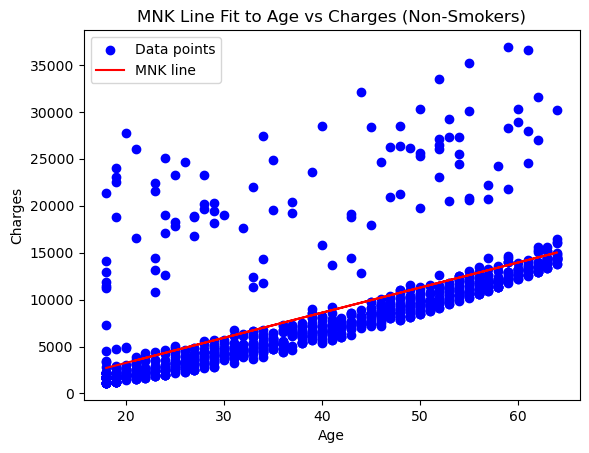

In [60]:
predicted_charges_MNK = np.dot(X_with_intercept1, MNK_koeff)
plt.scatter(x1, y1, color='blue', label='Data points')
plt.plot(x1, predicted_charges_MNK, color='red', label='MNK line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('MNK Line Fit to Age vs Charges (Non-Smokers)')
plt.legend()
plt.show()


Обчислимо середньоквадратичну помилку (RMSE) для МНК:

In [64]:
rmse_MNK = np.sqrt(np.mean((y1 - predicted_charges_MNK) ** 2))
print("RMSE (MNK):", rmse_MNK)

RMSE (MNK): 4662.505766636395


In [65]:
np.mean(y1), np.std(y1), np.min(y1)

(8434.268297856204, 5990.964530287611, 1121.8739)

**Висновок:**
1. Згідно з даними коефіцієнтів з кожним роком віку очікувана вартість charges зростає на приблизно на $267. Це видно на графіку, де пряма йде вгору поряд із найбільшим скупченням точок даних медичних платежів за віком.
2. Передбачувана лінія проходить по верхніх точках скупчення оскільки в даних є досить високі суми чарджів для окремих осіб
3. Згідно з RMSE модель помиляється на $4662,5 при прогнозі страхових внесків, і це майже 50% від середнього значення а також помилка є меншою за стандартне відхилення, що є позитивним показником що модель не просто обчислює середнє значення.


Відповідь до завдання 1.2

Описуємо функцію для розв"язання рівняння градієнтного спуску і повертаємо результатом коефіцієнти (w, b):

In [121]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [117]:
x2 = non_smoker_df["age"]
X_with_intercept2 = np.c_[np.ones(x2.shape[0]), x2]
y2 = non_smoker_df["charges"]
X_with_intercept2

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

Results for different learning rates:
Learning Rate: 0.01, m: 4145.9897490565745, b: 4145.9897490565745, RMSE: 5992.654011846218


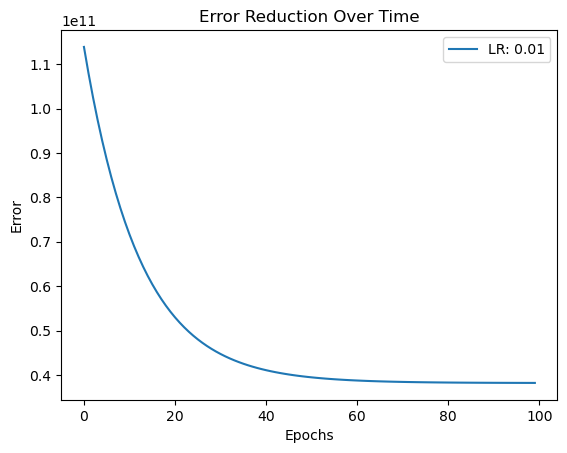

Learning Rate: 0.001, m: 1392.5711952573558, b: 1392.5711952573558, RMSE: 8234.335402457267


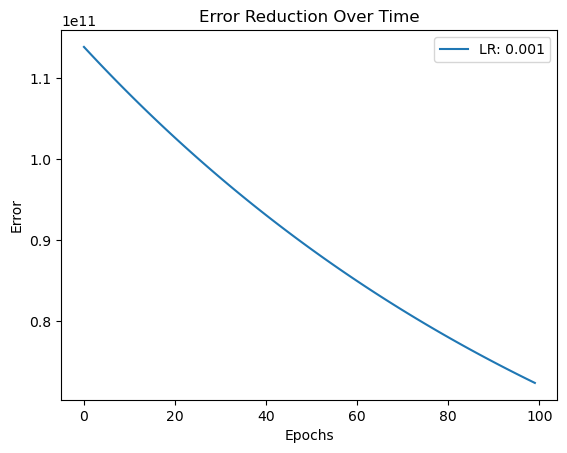

Learning Rate: 0.0001, m: 165.3886178896525, b: 165.3886178896525, RMSE: 10077.61000417879


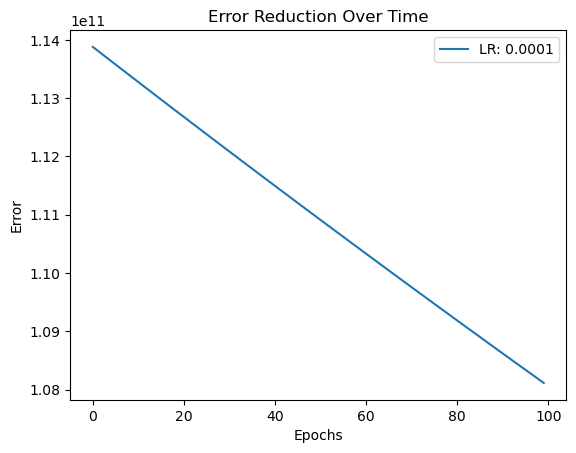

In [143]:
rates = [0.01, 0.001, 0.0001]
results = {}

for lr in rates:
    m, b, errors = full_batch_gradient_descent(X_with_intercept2, y2, lr=lr, epochs=100)
    predicted_charges = m * X_with_intercept2[:, 0] + b
    rmse = np.sqrt(np.mean((y2 - predicted_charges) ** 2))
    results[lr] = {
        'm': m,
        'b': b,
        'rmse': rmse,
        'errors': errors
    }
print("Results for different learning rates:")
for lr, result in results.items():
    print(f"Learning Rate: {lr}, m: {result['m']}, b: {result['b']}, RMSE: {result['rmse']}")
    plt.plot(result['errors'], label=f'LR: {lr}')

    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error Reduction Over Time')
    plt.legend()
    plt.show()


Gradient Descent coefficients:
m = 4145.9897490565745 - нахил лінії (m)
b = 4145.9897490565745 - зміщення лінії (b)
RMSE (Gradient Descent): 168181.01869253654


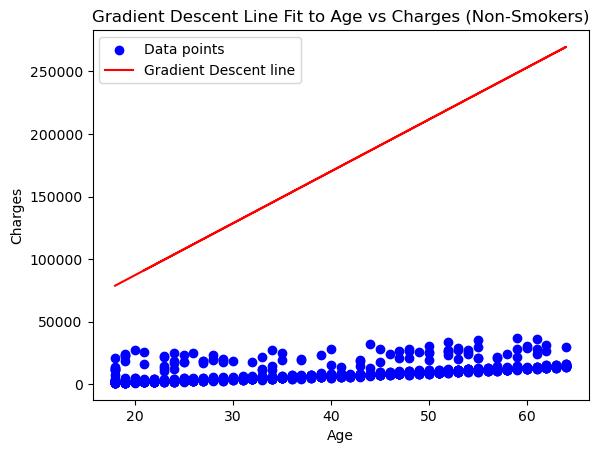

In [152]:
learning_rate = 0.01
m, b, errors = full_batch_gradient_descent(X_with_intercept2, y2, lr=learning_rate, epochs=100)
predicted_charges_fbgd = m * X_with_intercept2[:, 1] + b
rmse_fbdg = np.sqrt(np.mean((y2 - predicted_charges_fbgd) ** 2))
print("Gradient Descent coefficients:")
print("m =", m, "- нахил лінії (m)")
print("b =", b, "- зміщення лінії (b)")
print("RMSE (Gradient Descent):", rmse_fbdg)
plt.scatter(x2, y2, color='blue', label='Data points')
plt.plot(x2, predicted_charges_fbgd, color='red', label='Gradient Descent line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Gradient Descent Line Fit to Age vs Charges (Non-Smokers)')
plt.legend()
plt.show()

**Висновок:**
Після виконання всіх кроків ми отримали лінію регресії методом градієнтного спуску.
Дана модель має дуже велику похибку 5990 яка дорівнює середньому відхиленню від реальних значень.
Це свідчить про те, що лінійна модель не є найкращим вибором для даних, оскільки існує значна варіація в значеннях "charges" залежно від віку.

Відповідь до завдання 1.3

In [146]:
!pip install scikit-learn --quiet

In [147]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [153]:
x3 = non_smoker_df['age']
X_with_intercept3 = np.c_[np.ones(х3.shape[0]), х3]
y3 = non_smoker_df['charges']

In [154]:
lin_reg.fit(X_with_intercept3, y3)
print("Scikit-learn coefficients:")
print("w =", lin_reg.coef_[1], "- нахил лінії (w)")
print("b =", lin_reg.intercept_, "- зміщення лінії (b)")

Scikit-learn coefficients:
w = 267.24891283119956 - нахил лінії (w)
b = -2091.4205565650827 - зміщення лінії (b)


RMSE (Scikit-learn): 4662.505766636395


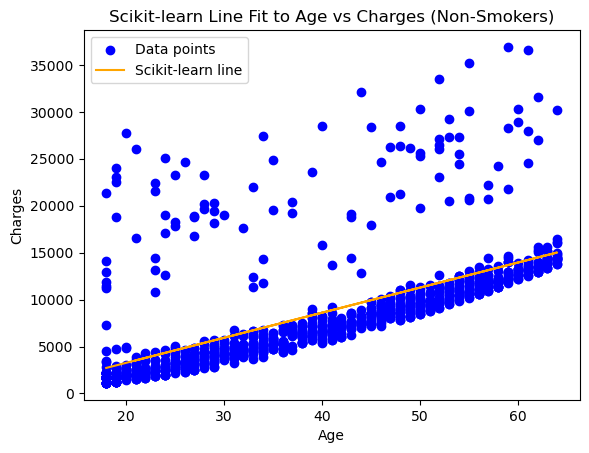

In [159]:
predicted_charges_sklearn = lin_reg.predict(X_with_intercept3)
rmse_sklearn = np.sqrt(np.mean((y3 - predicted_charges_sklearn) ** 2))
print("RMSE (Scikit-learn):", rmse_sklearn)
plt.scatter(x3, y3, color='blue', label='Data points')
plt.plot(x3, predicted_charges_sklearn, color='orange', label='Scikit-learn line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scikit-learn Line Fit to Age vs Charges (Non-Smokers)')
plt.legend()
plt.show()

**Висновок:**
1. Згідно з даними коефіцієнтів з кожним роком віку очікувана вартість charges зростає на приблизно на $267. Це видно на графіку, де пряма йде вгору поряд із найбільшим скупченням точок даних медичних платежів за віком.
2. Передбачувана лінія проходить по верхніх точках скупчення оскільки в даних є досить високі суми чарджів для окремих осіб
3. Згідно з RMSE модель помиляється на $4662,5 при прогнозі страхових внесків, і це майже 50% від середнього значення а також помилка є меншою за стандартне відхилення, що є позитивним показником що модель не просто обчислює середнє значення.
4. Прогноз даної моделі є аналогічним з МНК оскільки ця бібліотека використовує методи МНК

Візуалізація результатів:

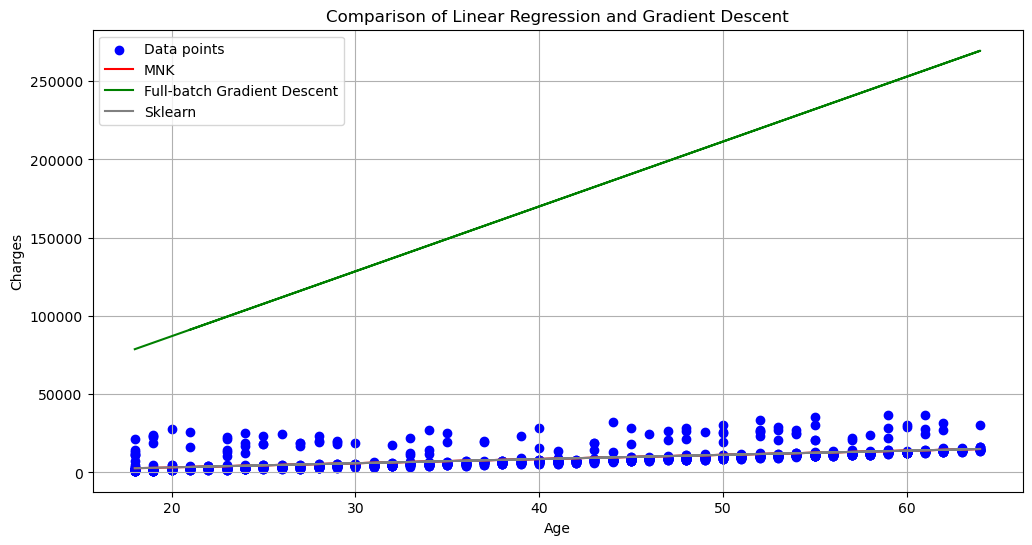

In [165]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(x1, y1, color='blue', label='Data points')
plt.plot(x1, predicted_charges_MNK, color='red', label='MNK')
plt.plot(x2, predicted_charges_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(x3, predicted_charges_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [166]:
print('RMSE (MNK):', rmse_MNK)
print('RMSE (Full-batch Gradient Descent):', rmse_fbdg)
print('RMSE (Scikit-learn):', rmse_sklearn)

RMSE (MNK): 4662.505766636395
RMSE (Full-batch Gradient Descent): 168181.01869253654
RMSE (Scikit-learn): 4662.505766636395


**Висновок:**

Результати моделей відрізняються, візуально найкраще передбачення створила модель МНК, при тому що модель градієнтного спуску неправильно передбачає платежі і значно їх завищує.

Згідно з моїми попередніми завданнями для аналізу ознак побудови лінійної регресії для навмання підібраних значень параметрів то найкраще підходить пара (280,-3500) і середньому кожен елемент відрізняється від фактичної цілі на $4753.18

Згідно моделі МНК в середньому кожен передбачуваний результат буде відрізнятись на $4662,5 з коефіцієнтами  [-2091.42055657   267.24891283], тому можна сказати що мої найкращі припущення майже збігається з передбаченнями моделі

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

C:\Users\shyx8\AppData\Local\Temp\ipykernel_34960\4292772184.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


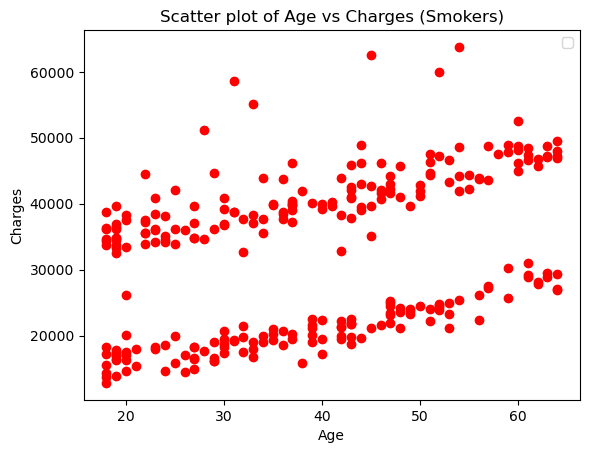

In [169]:
smoker_df = df[df.smoker == 'yes']
x_smoker = smoker_df['age']
y_smoker = smoker_df['charges']
plt.scatter(x_smoker, y_smoker, color='red')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter plot of Age vs Charges (Smokers)')
plt.legend()
plt.show()

Scikit-learn coefficients for smokers:
w = 305.23760210982874 - нахил лінії (w)
b = 20294.12812691597 - зміщення лінії (b)
RMSE (Scikit-learn for smokers): 10711.00334810241


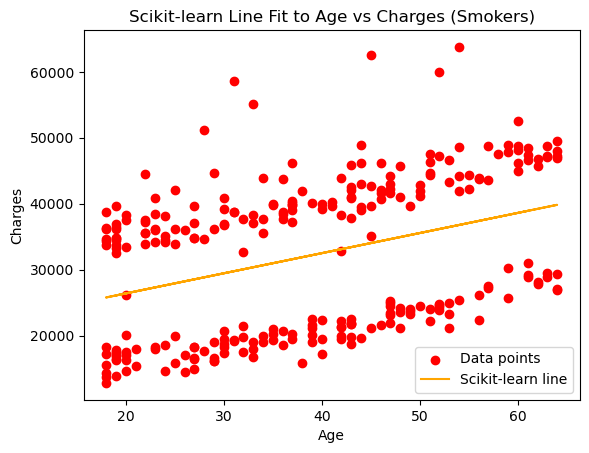

Mean charges for smokers: 32050.23183153284
Standard deviation of charges for smokers: 11520.466706529429
Minimum charges for smokers: 12829.4551


In [171]:
lin_reg_smoker = LinearRegression()
X_with_intercept_smoker = np.c_[np.ones(x_smoker.shape[0]), x_smoker]
lin_reg_smoker.fit(X_with_intercept_smoker, y_smoker)
print("Scikit-learn coefficients for smokers:")
print("w =", lin_reg_smoker.coef_[1], "- нахил лінії (w)")
print("b =", lin_reg_smoker.intercept_, "- зміщення лінії (b)")
predicted_charges_sklearn_smoker = lin_reg_smoker.predict(X_with_intercept_smoker)
rmse_sklearn_smoker = np.sqrt(np.mean((y_smoker - predicted_charges_sklearn_smoker) ** 2))
print("RMSE (Scikit-learn for smokers):", rmse_sklearn_smoker)
plt.scatter(x_smoker, y_smoker, color='red', label='Data points')
plt.plot(x_smoker, predicted_charges_sklearn_smoker, color='orange', label='Scikit-learn line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scikit-learn Line Fit to Age vs Charges (Smokers)')
plt.legend()
plt.show()

print('Mean charges for smokers:', np.mean(y_smoker))
print('Standard deviation of charges for smokers:', np.std(y_smoker))
print('Minimum charges for smokers:', np.min(y_smoker))

**Висновки:**

1. На першому графіку розподілу даних бачимо дві групи скупчення даних для тих людей що є курцями
2. Згідно коефіцієнтів з кожним роком віку витрати будуть зростати на $305 що показує зростаюча оранджева пряма
3. RMSE становить 10711 що майже дорівн.є стандартному відхиленню 11520, з чого можна зробити висновок що модель має низьку точність.
4. Низька точність моделі зумаовлена тим що вхідні дані розділені на дві групи, тому модель прогнозує середнє між цими двома скупченнями даних. Для більшої точності можливо варто розділити ці дві групи на окремі групи даних та провести передбачення окремо для кожної